In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [2]:
masses = {1,10,100,500,1000,2000}
epsilons = {1e-11,3e-11,7e-11,1e-10}
models = {'ref'}
cosmo = {}
k = 0.1

In [3]:
for m in masses:
    for e in epsilons:
        M = 'M='+str(m) + 'MeV e=' + str(e) + 'MeV'
        models.add(M)
        cosmo[M] = Class()
        cosmo[M].set({'gauge':'synchronous',
                      'output':'tCl, lCl',
                      'omega_cdm':0.12038,
                      'k_output_values':k,
                      #'z_reio':11.357,
                      #'reionization_z_start_max':750,
                      #'z_reiomod_start':300,
                      #'recfast_Nz0':80000,
                      #'recfast_z_initial':1e7,
                      'recombination':'recfast',
                      #'recfast_H_frac':3e-4,
                      #'reio_parametrization':'reio_none',
                      #'100*theta_s':1.042143,
                      #'100*theta_s':1.02,
                      #'background_verbose':5,
                      #'input_verbose':5,
                      'tight_coupling_approximation':0,
                      'h':0.67556,
                      'lensing':'yes',
                      'a_bidm':5e-4,
                      'f_bidm':0.99,
                      'A_bidm':3e-5,
                      'm_bidm':m,
                      'epsilon_bidm':e,
                      #'n_bidm':-4,
                      'bidm_type':'resonance',
                      'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                      'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                     })
cosmo['ref'] = Class()
cosmo['ref'].set({'gauge':'synchronous',
                      'output':'tCl, lCl',
                      'omega_cdm':0.12038,
                      'k_output_values':k,
                      #'z_reio':11.357,
                      #'reionization_z_start_max':750,
                      #'z_reiomod_start':300,
                      #'recfast_Nz0':80000,
                      #'recfast_z_initial':1e7,
                      'recombination':'recfast',
                      #'recfast_H_frac':3e-4,
                      #'reio_parametrization':'reio_none',
                      #'100*theta_s':1.042143,
                      #'100*theta_s':1.02,
                      #'background_verbose':5,
                      #'input_verbose':5,
                      'tight_coupling_approximation':0,
                      'h':0.67556,
                      'lensing':'yes',})

True

In [4]:
for M in models:
    print(M)
    cosmo[M].compute()

M=500MeV e=7e-11MeV
M=1000MeV e=3e-11MeV
M=500MeV e=3e-11MeV
M=100MeV e=7e-11MeV
M=1000MeV e=1e-11MeV
M=2000MeV e=7e-11MeV
M=1MeV e=1e-11MeV
M=1000MeV e=1e-10MeV
M=1MeV e=7e-11MeV
M=1MeV e=3e-11MeV
M=500MeV e=1e-10MeV
M=2000MeV e=3e-11MeV
M=1000MeV e=7e-11MeV
M=10MeV e=1e-11MeV
M=10MeV e=7e-11MeV
M=2000MeV e=1e-10MeV
M=100MeV e=1e-11MeV
M=1MeV e=1e-10MeV
M=100MeV e=1e-10MeV
ref
M=100MeV e=3e-11MeV
M=500MeV e=1e-11MeV
M=10MeV e=1e-10MeV
M=10MeV e=3e-11MeV
M=2000MeV e=1e-11MeV


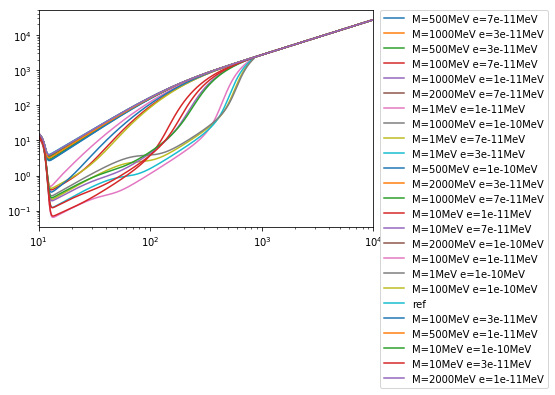

In [12]:
for M in models:
    Th = cosmo[M].get_thermodynamics()
    Tb = Th['Tb [K]']
    z = Th['z']
    plt.loglog(z,Tb,label=M)
plt.xlim([10,1e4])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

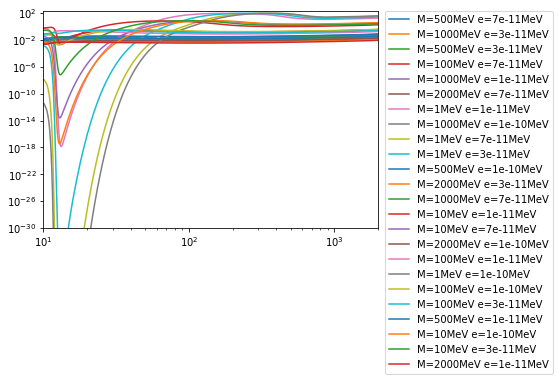

In [17]:
plt.figure(figsize = (20,10))
for M in models:
    if M != 'ref':
        Th = cosmo[M].get_thermodynamics()
        R = Th['Rbidm']
        z = Th['z']
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        plt.loglog(z,(1+z)*R/H,label=M)
plt.xlim([10,2e3])
plt.ylim([1e-30,2e2])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

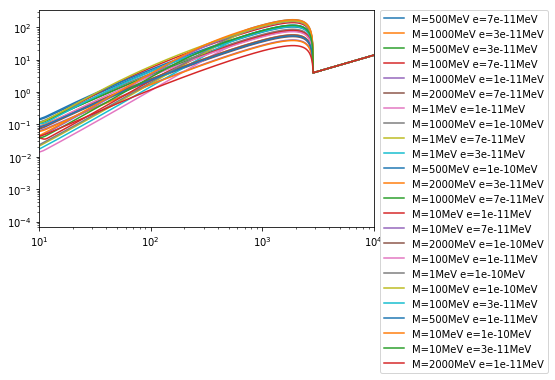

In [15]:
plt.figure(figsize = (20,10))
for M in models:
    if M != 'ref':
        Th = cosmo[M].get_thermodynamics()
        Tbidm = Th['Tbidm [K]']
        z = Th['z']
        plt.loglog(z,Tbidm,label=M)
plt.xlim([10,1e4])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [18]:
all_k ={}
one_k ={}
for M in models:
    all_k[M] = cosmo[M].get_perturbations()
    one_k[M] = all_k[M]['scalar'][0] 

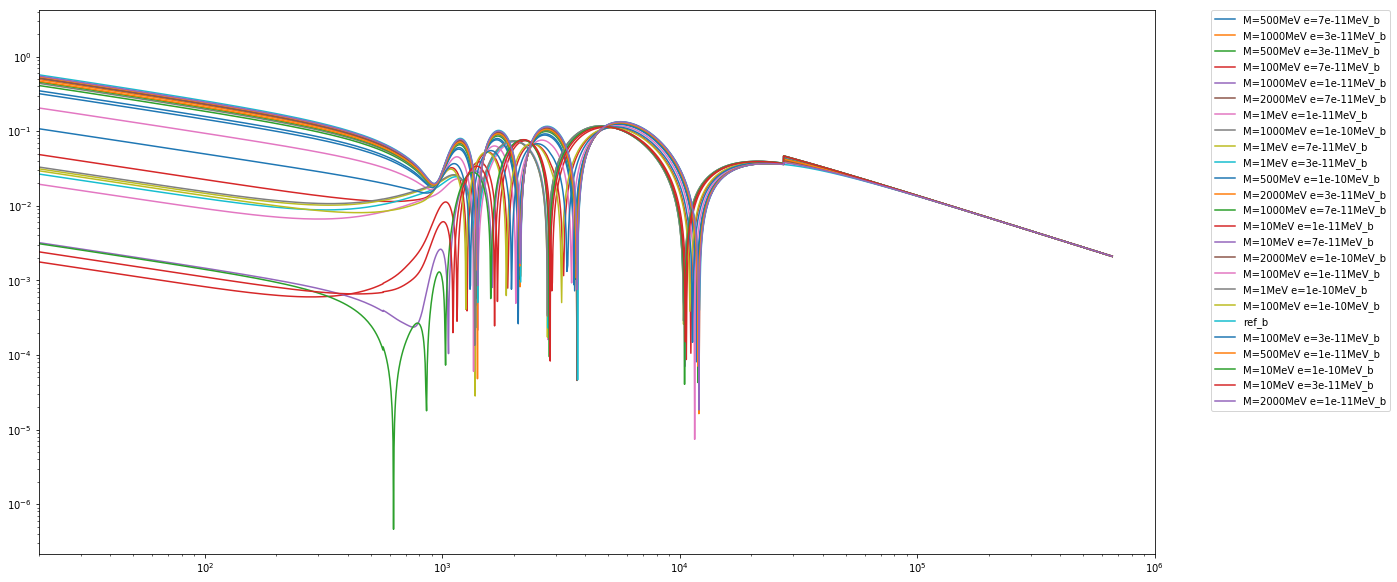

In [19]:
plt.figure(figsize = (20,10))
for M in models:
    tau = one_k[M]['tau [Mpc]']
    a = one_k[M]['a']
    z = 1/a -1
    theta_b = abs(one_k[M]['theta_b'])
    #theta_g = abs(one_k[M]['theta_g'])
    plt.loglog(z,theta_b,label=M + '_b')
    #plt.loglog(a,theta_g,label=M + '_g')
    #if M != 'ref':
    #    theta_idm = abs(one_k[M]['theta_bidm'])
    #    plt.loglog(z,theta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

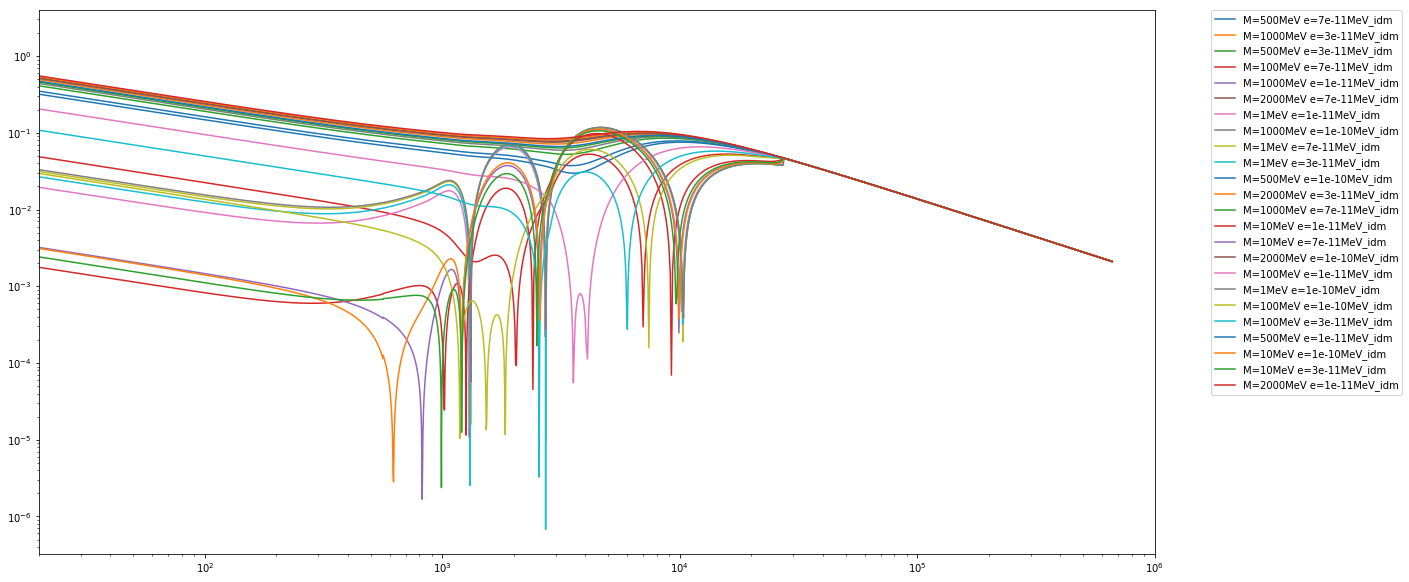

In [21]:
plt.figure(figsize = (20,10))
for M in models:
    if M != 'ref':
        tau = one_k[M]['tau [Mpc]']
        a = one_k[M]['a']
        z = 1/a -1
        #theta_b = abs(one_k[M]['theta_b'])
        #theta_g = abs(one_k[M]['theta_g'])
        #plt.loglog(z,theta_b,label=M + '_b')
        #plt.loglog(a,theta_g,label=M + '_g')
        #if M != 'ref':
        theta_idm = abs(one_k[M]['theta_bidm'])
        plt.loglog(z,theta_idm,label=M + '_idm')
plt.xlim([20,1e6])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0,0.5,'$\\Delta TT / TT_{ref}$ [\\%]')

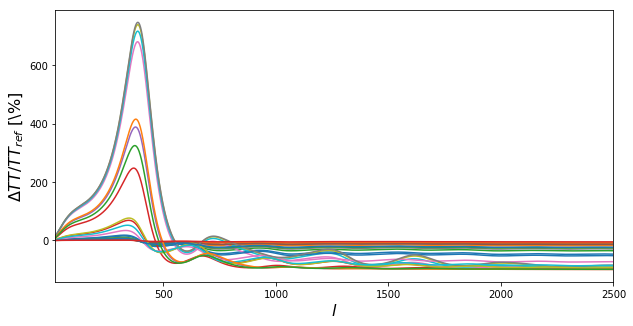

In [22]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmo['ref'].lensed_cl(2500)
TTref = clref['tt']
for M in models:
    if M != 'ref':
        cl = cosmo[M].lensed_cl(2500)
        l = cl['ell']
        TT = cl['tt']
        ax.plot(l,100*(TT-TTref)/TTref, label=M)
ax.set_xlim(20,2.5e3)
ax.set_xlabel('$l$',fontsize=16)
ax.set_ylabel('$\Delta TT / TT_{ref}$ [\%]',fontsize=16)

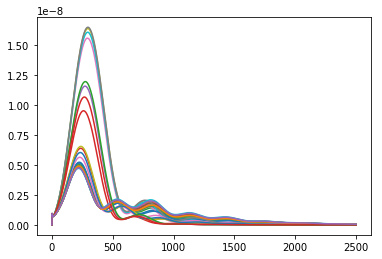

In [25]:
for M in models:
    cl = cosmo[M].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    plt.plot(l,l*(l+1)*TT, label=M)